<a href="https://colab.research.google.com/github/matthew-long601/Machine-Learning-Project/blob/main/CapstoneProjectDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import seaborn as sns

In [ ]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k']
raw_dataset = pd.read_csv(train, names=column_names, na_values='?', comment='\t', sep=',', skipinitialspace=True)


In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=2)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [ ]:
#define Decision Tree
dt = DecisionTreeClassifier(criterion = 'entropy')
#Define input vectors
#X is the features in this dataset
X = train_dataset['education-num'].values.reshape(-1, 1)
#Y is the vector with our Target Variables
Y = train_dataset['50k'].values
#start fitting process
dt.fit(X, Y)

tree_graph_to_png(dt, feature_names=['education-num'], 
                 png_file_to_save='dt.png')

[Text(0.6, 0.9444444444444444, 'education-num <= 12.5\nentropy = 0.798\nsamples = 26049\nvalue = [19752, 6297]'),
 Text(0.4, 0.8333333333333334, 'education-num <= 8.5\nentropy = 0.642\nsamples = 19644\nvalue = [16436, 3208]'),
 Text(0.2, 0.7222222222222222, 'education-num <= 2.5\nentropy = 0.327\nsamples = 3380\nvalue = [3178, 202]'),
 Text(0.1, 0.6111111111111112, 'education-num <= 1.5\nentropy = 0.161\nsamples = 170\nvalue = [166, 4]'),
 Text(0.05, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.15, 0.5, 'entropy = 0.195\nsamples = 133\nvalue = [129, 4]'),
 Text(0.3, 0.6111111111111112, 'education-num <= 7.5\nentropy = 0.334\nsamples = 3210\nvalue = [3012, 198]'),
 Text(0.25, 0.5, 'education-num <= 6.5\nentropy = 0.326\nsamples = 2854\nvalue = [2684, 170]'),
 Text(0.2, 0.3888888888888889, 'education-num <= 3.5\nentropy = 0.337\nsamples = 1923\nvalue = [1803, 120]'),
 Text(0.15, 0.2777777777777778, 'entropy = 0.296\nsamples = 268\nvalue = [254, 14]'),
 Text(0.25, 0.27777

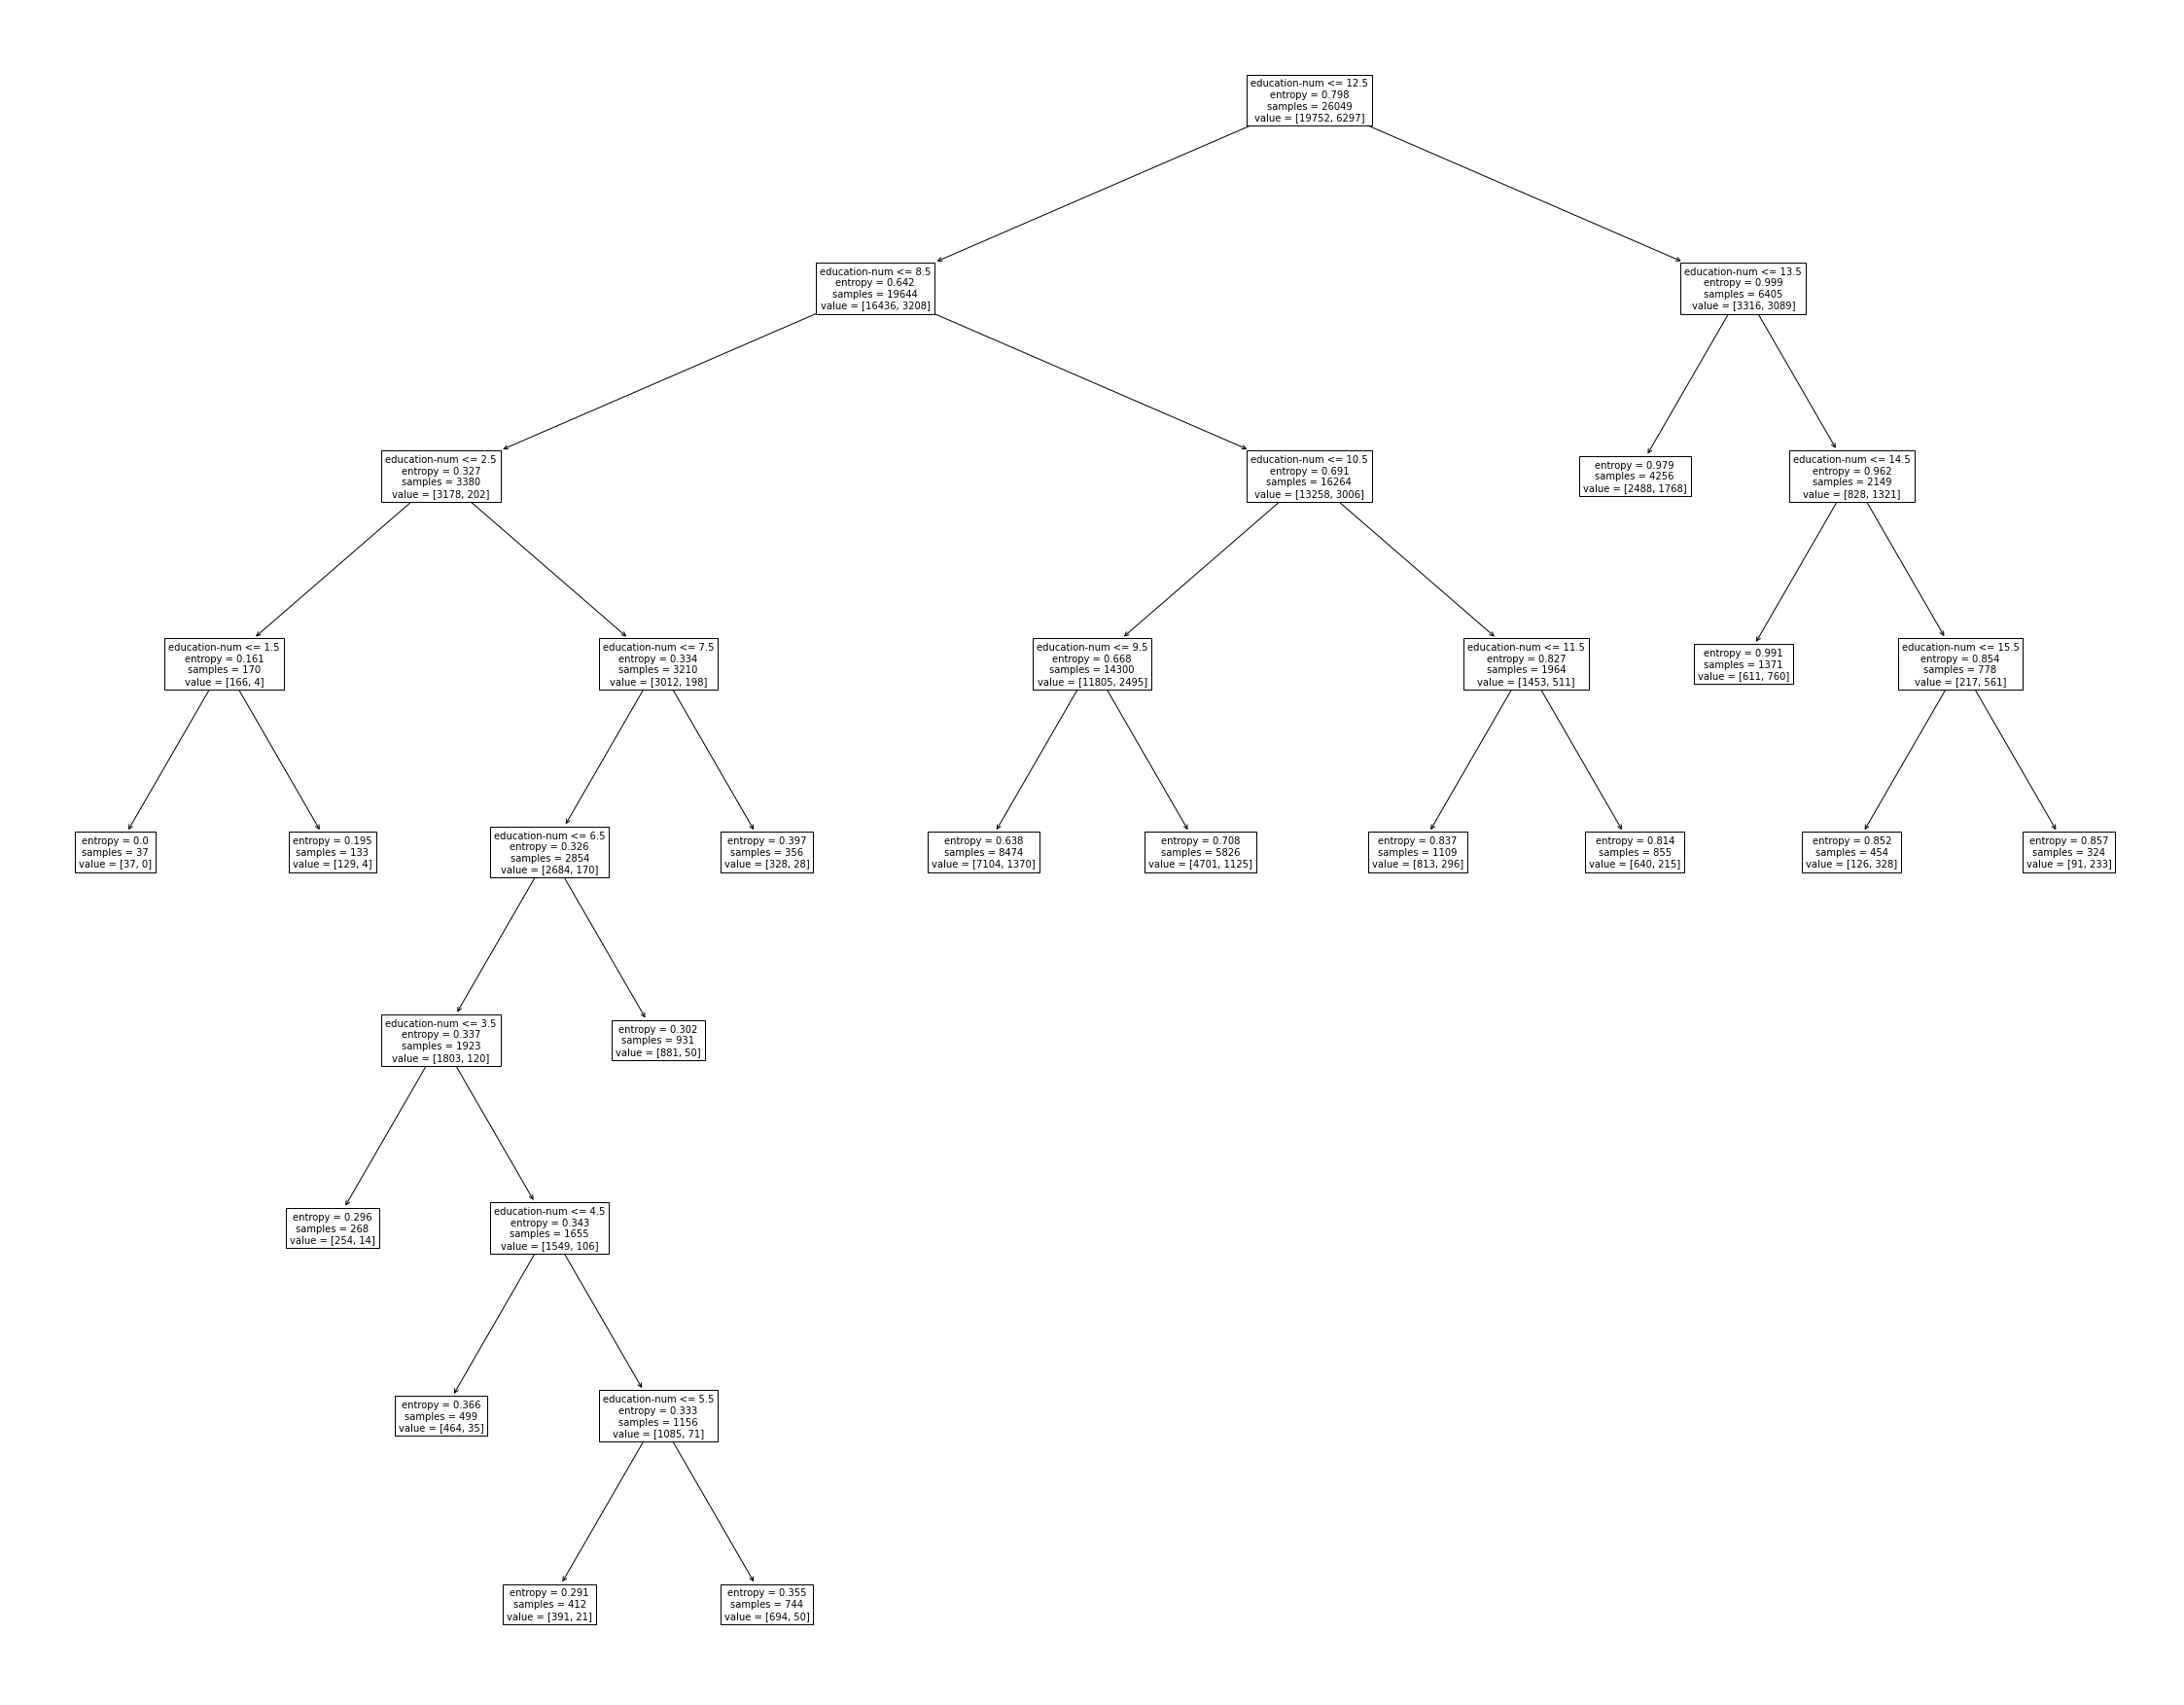

In [ ]:
plt.figure(figsize=(40,32))
tree.plot_tree(dt, feature_names=['education-num'], fontsize=10)

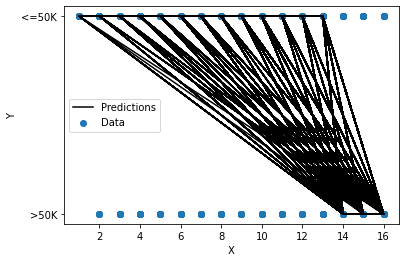

In [ ]:
Y_hat = dt.predict(X)
def plot_scatter(x, y):
  plt.scatter(X, Y, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
plot_scatter(X, Y_hat)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y, Y_hat))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     19752
        >50K       0.61      0.21      0.31      6297

    accuracy                           0.78     26049
   macro avg       0.70      0.58      0.59     26049
weighted avg       0.75      0.78      0.73     26049



In [ ]:
#X is the features in this dataset
test_X = test_dataset['education-num'].values.reshape(-1, 1)
#Y is the vector with our Target Variables
test_Y = test_dataset['50k'].values

test_Y_hat = dt.predict(test_X)


In [ ]:
print(classification_report(test_Y, test_Y_hat))

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      4968
        >50K       0.65      0.24      0.35      1544

    accuracy                           0.79      6512
   macro avg       0.73      0.60      0.61      6512
weighted avg       0.77      0.79      0.75      6512

